# Using Pre-trained and Finetuned Wav2Vec2

## Imports

In [1]:
import os
import shutil
import librosa
import numpy as np
import pandas as pd
from kagglehub import dataset_download

## Download Dataset from Kaggle

In [2]:
path = dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")
print("Path to dataset files:", path)

speech_output_path = "/content/ravdess_speech"
os.makedirs(speech_output_path, exist_ok=True)

100%|██████████| 429M/429M [00:20<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1


In [3]:
path

'/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1'

## Store the Speech Audio Files

In [4]:

def filter_speech_files(path, output_path):
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(".wav"):
                parts = file.split("-")

                # Check if it's audio-only (03) and speech (01)
                if parts[0] == "03" and parts[1] == "01":
                    src_path = os.path.join(root, file)
                    dest_path = os.path.join(output_path, file)
                    shutil.copy(src_path, dest_path)
    print(f"Speech audio files saved to: {output_path}")


filter_speech_files(path, speech_output_path)


Speech audio files saved to: /content/ravdess_speech


In [ ]:
os.listdir(speech_output_path)

['03-01-02-02-01-02-18.wav',
 '03-01-08-02-02-01-09.wav',
 '03-01-02-01-02-01-05.wav',
 '03-01-08-01-02-02-10.wav',
 '03-01-02-01-01-02-05.wav',
 '03-01-06-01-02-02-20.wav',
 '03-01-05-02-02-02-01.wav',
 '03-01-05-01-01-01-04.wav',
 '03-01-04-01-01-02-10.wav',
 '03-01-01-01-01-02-17.wav',
 '03-01-05-01-02-01-05.wav',
 '03-01-01-01-01-02-19.wav',
 '03-01-03-02-02-02-19.wav',
 '03-01-06-02-02-02-20.wav',
 '03-01-02-02-02-01-05.wav',
 '03-01-07-02-02-02-03.wav',
 '03-01-04-01-02-01-21.wav',
 '03-01-08-01-02-02-16.wav',
 '03-01-08-02-01-01-03.wav',
 '03-01-04-01-01-02-21.wav',
 '03-01-04-02-01-02-11.wav',
 '03-01-06-02-01-02-20.wav',
 '03-01-02-02-01-02-06.wav',
 '03-01-01-01-02-02-06.wav',
 '03-01-02-01-02-01-07.wav',
 '03-01-07-02-01-01-11.wav',
 '03-01-05-01-01-01-22.wav',
 '03-01-03-01-01-01-03.wav',
 '03-01-08-01-02-02-17.wav',
 '03-01-05-02-01-02-08.wav',
 '03-01-02-02-01-01-11.wav',
 '03-01-03-02-02-02-13.wav',
 '03-01-02-01-02-02-09.wav',
 '03-01-07-01-01-02-01.wav',
 '03-01-07-02-

## Analysing the Pre-trained Model

In [ ]:
import torch
import torch.nn
from transformers import Wav2Vec2FeatureExtractor, AutoModelForAudioClassification

model_name = "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"

# Wav2Vec2 feature extractor
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)

# model for audio classification
model = AutoModelForAudioClassification.from_pretrained(model_name)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:315: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition and are newly initialized: ['classifier.bias', 'classifier.weight', '

In [ ]:
model

Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
print(model.config)

Wav2Vec2Config {
  "_attn_implementation_autoset": true,
  "activation_dropout": 0.05,
  "adapter_attn_dim": null,
  "adapter_kernel_size": 3,
  "adapter_stride": 2,
  "add_adapter": false,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": true,
  "conv_dim": [
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "conv_kernel": [
    10,
    3,
    3,
    3,
    3,
    2,
    2
  ],
  "conv_stride": [
    5,
    2,
    2,
    2,
    2,
    2,
    2
  ],
  "ctc_loss_reduction": "mean",
  "ctc_zero_infinity": true,
  "diversity_loss_weight": 0.1,
  "do_stable_layer_norm": true,
  "eos_token_id": 2,
  "feat_extract_activation": "gelu",
  "feat_extract_dropout": 0.0,
  "feat_extract_norm": "layer",
  "feat_proj_dropout": 0.05,
  "feat_quantizer_dropout": 0.0,
  "final_dr

## Emotion Label Mapping

In [5]:
import os
import librosa
import torch
import torch.nn as nn
import torchaudio
import numpy as np
from transformers import Wav2Vec2FeatureExtractor, AutoModelForAudioClassification
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import Wav2Vec2FeatureExtractor
from torch.utils.data import random_split

# Define emotion labels mapping
ravdess_to_model = {
    1: "neutral", 2: "calm", 3: "happy", 4: "sad",
    5: "angry", 6: "fearful", 7: "disgust", 8: "surprised"
}
model_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
ravdess_to_model_index = {k: model_labels.index(v) for k, v in ravdess_to_model.items()}

# Load Wav2Vec2 feature extractor
model_name = "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)

# Function to extract label from filename
def get_label_from_filename(filename):
    parts = filename.split("-")
    emotion_id = int(parts[2])  # 3rd element is emotion
    return ravdess_to_model_index[emotion_id]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

## RAVDESS Dataset Class

In [6]:
# Custom Dataset Class
class RAVDESSDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.files = [f for f in os.listdir(root_dir) if f.endswith(".wav")]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_name = self.files[idx]
        file_path = os.path.join(self.root_dir, file_name)

        # Load audio and extract features
        audio, sr = librosa.load(file_path, sr=16000, mono=True)
        inputs = feature_extractor(audio, sampling_rate=16000, return_tensors="pt", padding=True)
        del audio
        import gc
        gc.collect()

        return {"input_values": inputs.input_values.squeeze(0), "label": get_label_from_filename(file_name)}

## Collate function

In [7]:
# Collate function for DataLoader
def collate_fn(batch):
    input_values = [item["input_values"].clone().detach() if isinstance(item["input_values"], torch.Tensor)
                else torch.tensor(item["input_values"]) for item in batch]

    labels = torch.tensor([item["label"] for item in batch])

    # Pad inputs to the same length
    input_values = pad_sequence(input_values, batch_first=True, padding_value=0.0)

    return input_values, labels


In [8]:

# Load dataset
speech_dir= "/content/ravdess_speech"
dataset= RAVDESSDataset(speech_dir)

# Define split sizes (80% train, 10% validation, 10% test)
train_size= int(0.8 * len(dataset))
val_size= int(0.1 * len(dataset))
test_size= len(dataset) - train_size - val_size

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


batch_size= 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                        collate_fn=collate_fn, num_workers=2,
                        pin_memory=torch.cuda.is_available())
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                      collate_fn=collate_fn, num_workers=2,
                      pin_memory=torch.cuda.is_available())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                       collate_fn=collate_fn, num_workers=2,
                       pin_memory=torch.cuda.is_available())

# Print dataset sizes
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Train samples: 1152
Validation samples: 144
Test samples: 144


## Optimizers

In [ ]:
import gc

# Initialize model
model = AutoModelForAudioClassification.from_pretrained(
    model_name,
    num_labels=len(model_labels),
    id2label={i: label for i, label in enumerate(model_labels)},
    label2id={label: i for i, label in enumerate(model_labels)},
)
## onyl training classifier layers
for param in model.wav2vec2.parameters():
    param.requires_grad = False


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition and are newly initialized: ['classifier.bias', 'classifier.weight', '

In [ ]:
id2label={i: label for i, label in enumerate(model_labels)}

In [ ]:
id2label

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fearful',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

In [ ]:
label2id={label: i for i, label in enumerate(model_labels)}

In [ ]:
label2id

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fearful': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprised': 7}

## Training and Validation

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7895cc1fdbc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7895cc1fdbc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 1/5, Loss: 0.7491, Accuracy: 0.8819
Validation Loss: 0.6648, Validation Accuracy: 0.9236
Saved new best model with validation accuracy: 0.9236
Epoch 2/5, Loss: 0.7427, Accuracy: 0.8837
Validation Loss: 0.6627, Validation Accuracy: 0.9306
Saved new best model with validation accuracy: 0.9306
Epoch 3/5, Loss: 0.7337, Accuracy: 0.8811
Validation Loss: 0.6355, Validation Accuracy: 0.9444
Saved new best model with validation accuracy: 0.9444
Epoch 4/5, Loss: 0.7208, Accuracy: 0.8915
Validation Loss: 0.6423, Validation Accuracy: 0.9375
Epoch 5/5, Loss: 0.7263, Accuracy: 0.8880
Validation Loss: 0.6323, Validation Accuracy: 0.9375


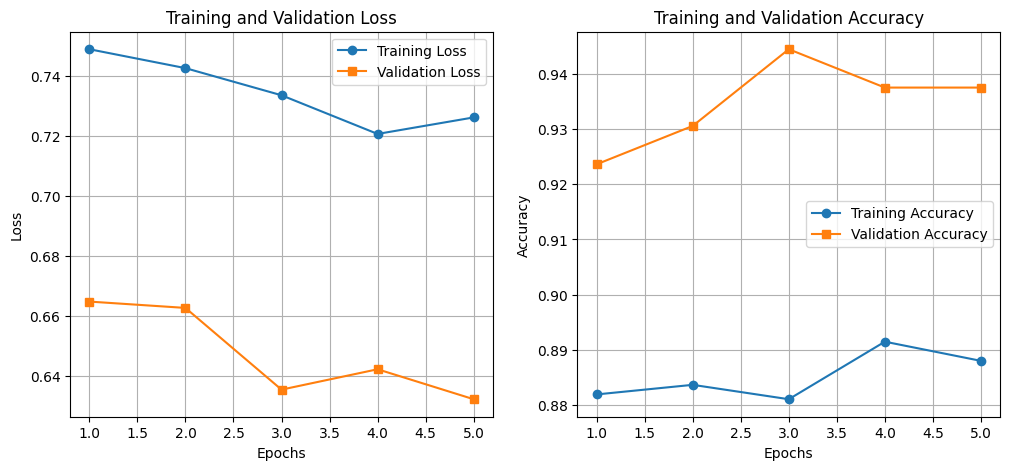

In [ ]:
num_epochs = 5
best_val_accuracy = 0
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).logits

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)


        del inputs, labels, outputs, preds, loss
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()

    train_accuracy = correct / total
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}")

    # Validation loop
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).logits

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

            del inputs, labels, outputs, preds, loss
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()

    val_accuracy = val_correct / val_total
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_model.pt")
        print(f"Saved new best model with validation accuracy: {val_accuracy:.4f}")

    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# ====================== Plot Loss & Accuracy Curves ======================

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

## Testing

Final Test Accuracy: 0.9722


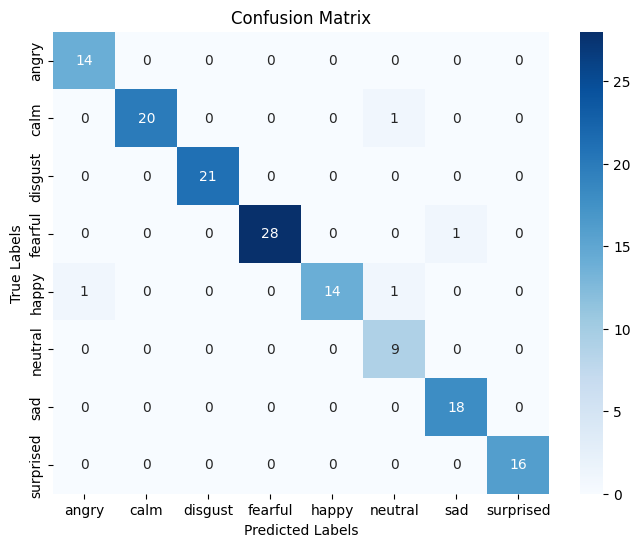

Classification Report:
              precision    recall  f1-score   support

       angry       0.93      1.00      0.97        14
        calm       1.00      0.95      0.98        21
     disgust       1.00      1.00      1.00        21
     fearful       1.00      0.97      0.98        29
       happy       1.00      0.88      0.93        16
     neutral       0.82      1.00      0.90         9
         sad       0.95      1.00      0.97        18
   surprised       1.00      1.00      1.00        16

    accuracy                           0.97       144
   macro avg       0.96      0.97      0.97       144
weighted avg       0.98      0.97      0.97       144

AUC-ROC Score (Multi-class): 0.9998


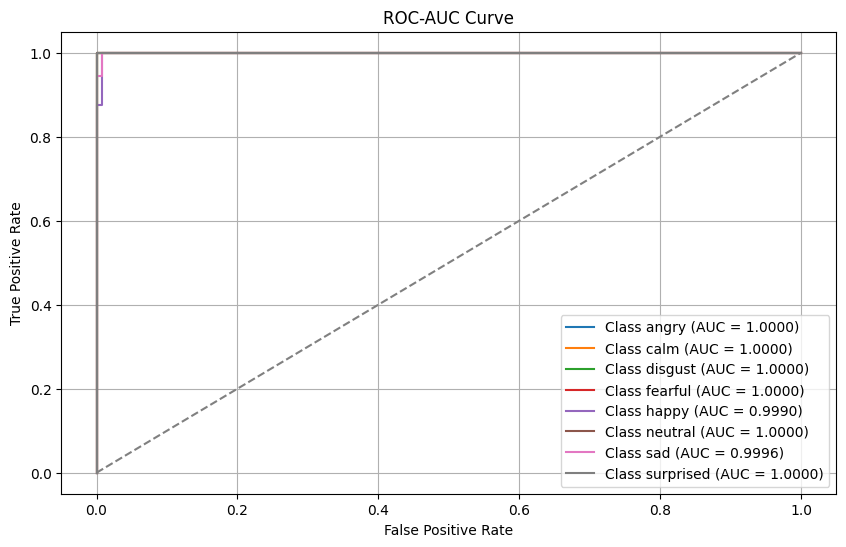

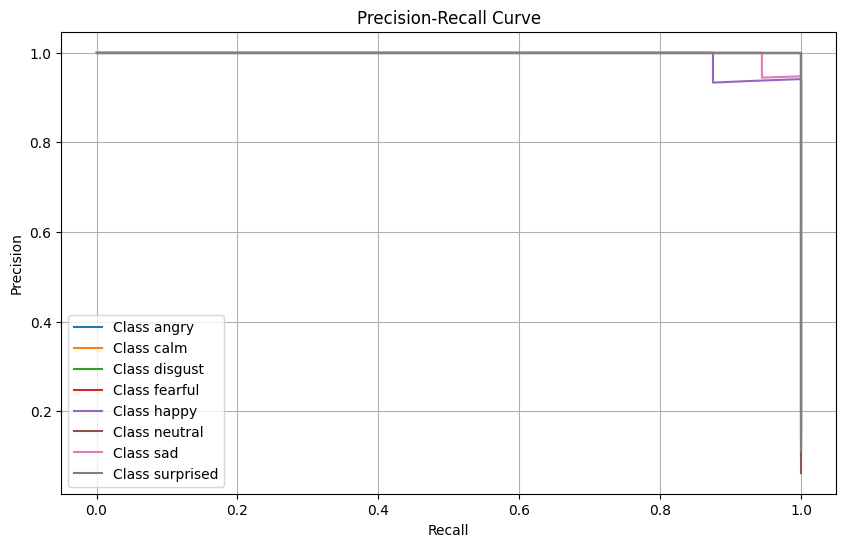

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

## loading the trained model
model.load_state_dict(torch.load("best_model.pt"))
model.to(device)
model.eval()

all_probs = []
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs).logits

        probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        preds = torch.argmax(outputs, dim=1)   # Get predicted class

        all_probs.append(probs.cpu().numpy())
        all_preds.append(preds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)
all_probs = np.concatenate(all_probs)

# Accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# ====================== Confusion Matrix ======================

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=model_labels, yticklabels=model_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ====================== Classification Report ======================

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=model_labels))

# ====================== ROC-AUC Curve ======================

plt.figure(figsize=(10, 6))

if len(model_labels) > 2:  # Multi-class case
    auc_score = roc_auc_score(all_labels, all_probs, multi_class="ovr")
    print(f"AUC-ROC Score (Multi-class): {auc_score:.4f}")

    for i in range(len(model_labels)):
        fpr, tpr, _ = roc_curve(all_labels == i, all_probs[:, i])
        plt.plot(fpr, tpr, label=f"Class {model_labels[i]} (AUC = {auc(fpr, tpr):.4f})")

else:  # Binary classification case
    fpr, tpr, _ = roc_curve(all_labels, all_probs[:, 1])
    auc_score = auc(fpr, tpr)
    print(f"AUC-ROC Score (Binary): {auc_score:.4f}")
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid()
plt.show()

# ====================== Precision-Recall Curve ======================

plt.figure(figsize=(10, 6))

if len(model_labels) > 2:  # Multi-class case
    for i in range(len(model_labels)):
        precision, recall, _ = precision_recall_curve(all_labels == i, all_probs[:, i])
        plt.plot(recall, precision, label=f"Class {model_labels[i]}")

else:  # Binary classification case
    precision, recall, _ = precision_recall_curve(all_labels, all_probs[:, 1])
    plt.plot(recall, precision, label="Precision-Recall Curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# Using Wav2Vec2

## Load Wav2Vec2


In [9]:
from transformers import Wav2Vec2Model, Wav2Vec2FeatureExtractor
model_name = "facebook/wav2vec2-base"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

## Custom Speech Emotion Recognition model using Wav2Vec2

In [10]:

class SpeechEmotionClassifier(nn.Module):
    def __init__(self, model_name, num_labels):
        super(SpeechEmotionClassifier, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.1)

        # Wav2Vec2 hidden size is 768 for the base model
        hidden_size = 768

        # Add classifier layers
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_labels)
        )

    def forward(self, input_values):
        # Get Wav2Vec2 features
        outputs = self.wav2vec2(input_values)

        # Use the mean of the last hidden state for classification
        hidden_states = outputs.last_hidden_state
        pooled_output = torch.mean(hidden_states, dim=1)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        return logits

In [11]:
speech_dir = "/content/ravdess_speech"
dataset = RAVDESSDataset(speech_dir)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpeechEmotionClassifier(model_name, len(model_labels))
model.to(device)

# Freeze most of the Wav2Vec2 model
for name, param in model.wav2vec2.named_parameters():
    # Only unfreeze the last 2 transformer layers
    if "encoder.layers.11" in name or "encoder.layers.10" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:315: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

In [13]:
model

SpeechEmotionClassifier(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    

## Training and Validation

Epoch 1/10, Loss: 1.8619, Accuracy: 0.3012
Validation Accuracy: 0.5417
Saved new best model with validation accuracy: 0.5417
Epoch 2/10, Loss: 1.4706, Accuracy: 0.5182
Validation Accuracy: 0.5556
Saved new best model with validation accuracy: 0.5556
Epoch 3/10, Loss: 1.1337, Accuracy: 0.6927
Validation Accuracy: 0.6597
Saved new best model with validation accuracy: 0.6597
Epoch 4/10, Loss: 0.9254, Accuracy: 0.7917
Validation Accuracy: 0.7431
Saved new best model with validation accuracy: 0.7431
Epoch 5/10, Loss: 0.8137, Accuracy: 0.8455
Validation Accuracy: 0.7153
Epoch 6/10, Loss: 0.7265, Accuracy: 0.8854
Validation Accuracy: 0.7708
Saved new best model with validation accuracy: 0.7708
Epoch 7/10, Loss: 0.6827, Accuracy: 0.9028
Validation Accuracy: 0.7361
Epoch 8/10, Loss: 0.6462, Accuracy: 0.9288
Validation Accuracy: 0.8194
Saved new best model with validation accuracy: 0.8194
Epoch 9/10, Loss: 0.6210, Accuracy: 0.9384
Validation Accuracy: 0.8750
Saved new best model with validation 

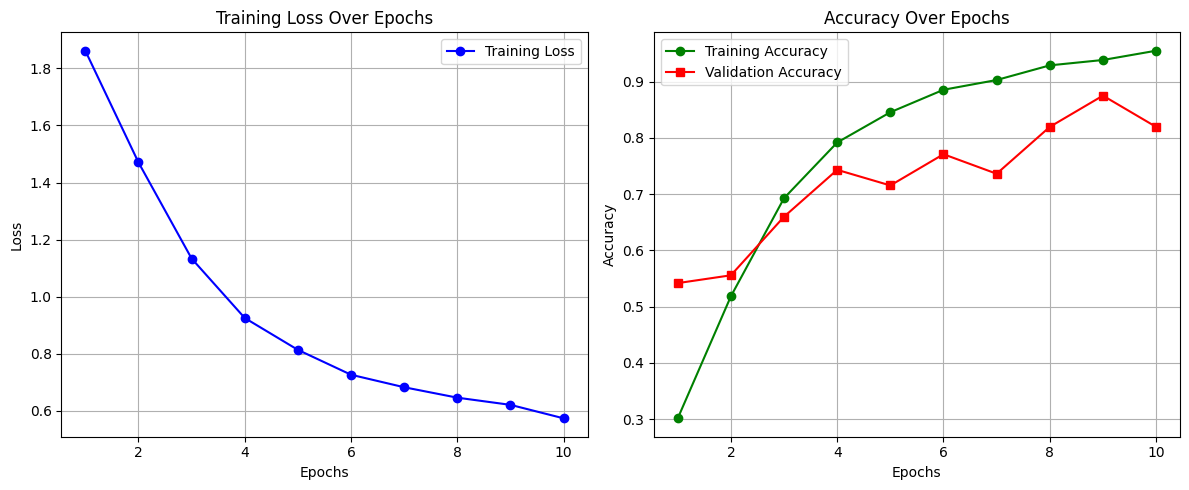

In [14]:
import matplotlib.pyplot as plt
import gc
import torch

num_epochs = 10
best_val_accuracy = 0

train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        logits = model(inputs)

        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        del inputs, labels, logits, preds, loss
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()


    epoch_loss = total_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {train_accuracy:.4f}")

    # Validation loop
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs)

            preds = torch.argmax(logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

            del inputs, labels, logits, preds
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()

    val_accuracy = val_correct / val_total
    val_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_wav2_model.pt")
        print(f"Saved new best model with validation accuracy: {val_accuracy:.4f}")


    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print(f"Best validation accuracy: {best_val_accuracy:.4f}")

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, 'b-', marker='o', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, 'g-', marker='o', label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, 'r-', marker='s', label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()


## Testing

Final Test Accuracy: 0.8681


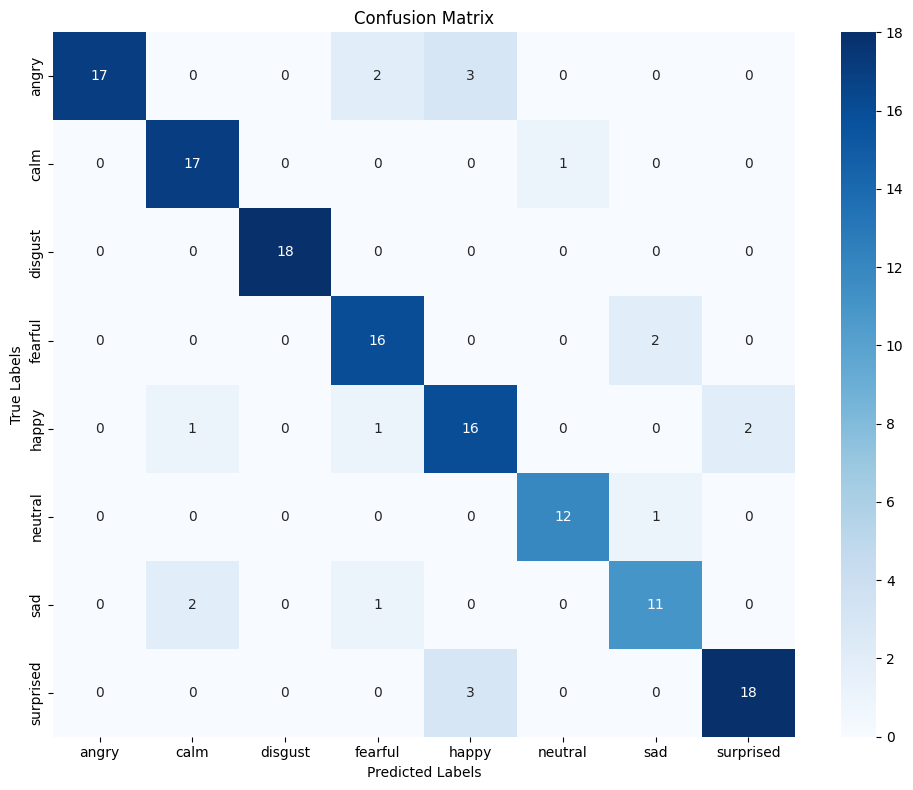

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.77      0.87        22
        calm       0.85      0.94      0.89        18
     disgust       1.00      1.00      1.00        18
     fearful       0.80      0.89      0.84        18
       happy       0.73      0.80      0.76        20
     neutral       0.92      0.92      0.92        13
         sad       0.79      0.79      0.79        14
   surprised       0.90      0.86      0.88        21

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.88      0.87      0.87       144

AUC-ROC Score (Multi-class): 0.9872


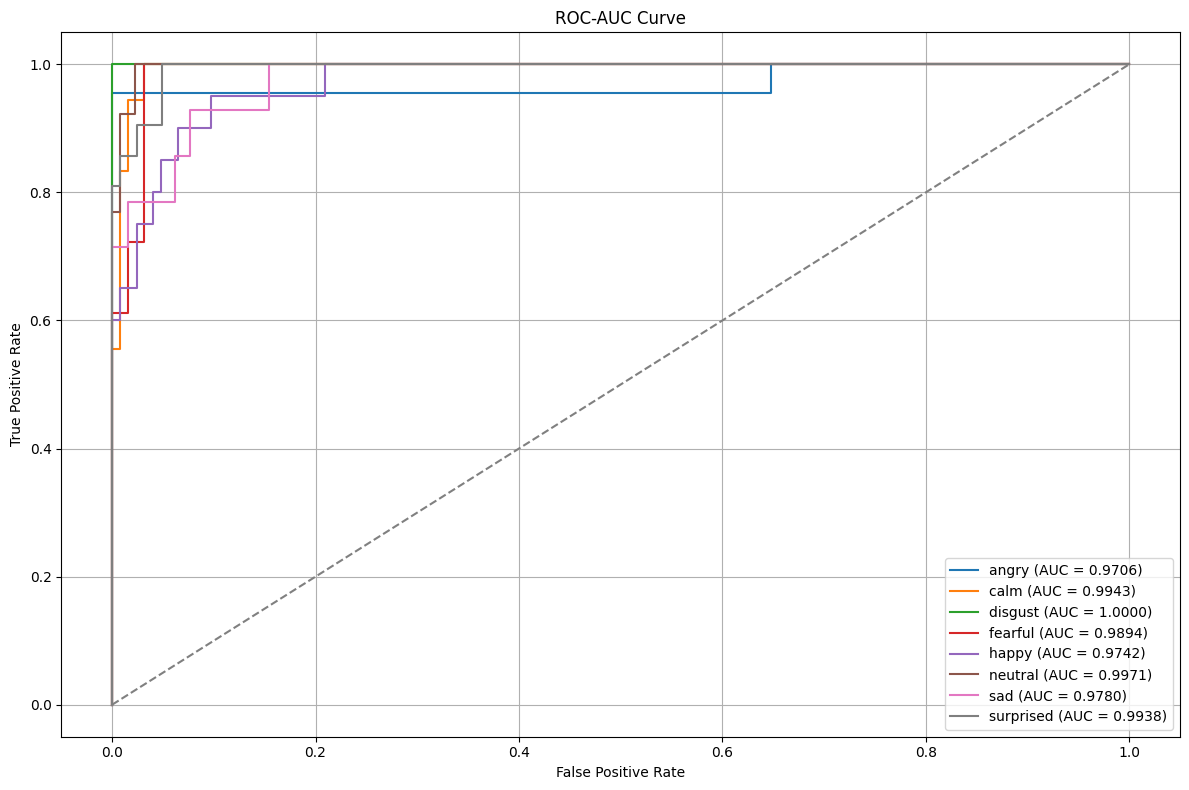

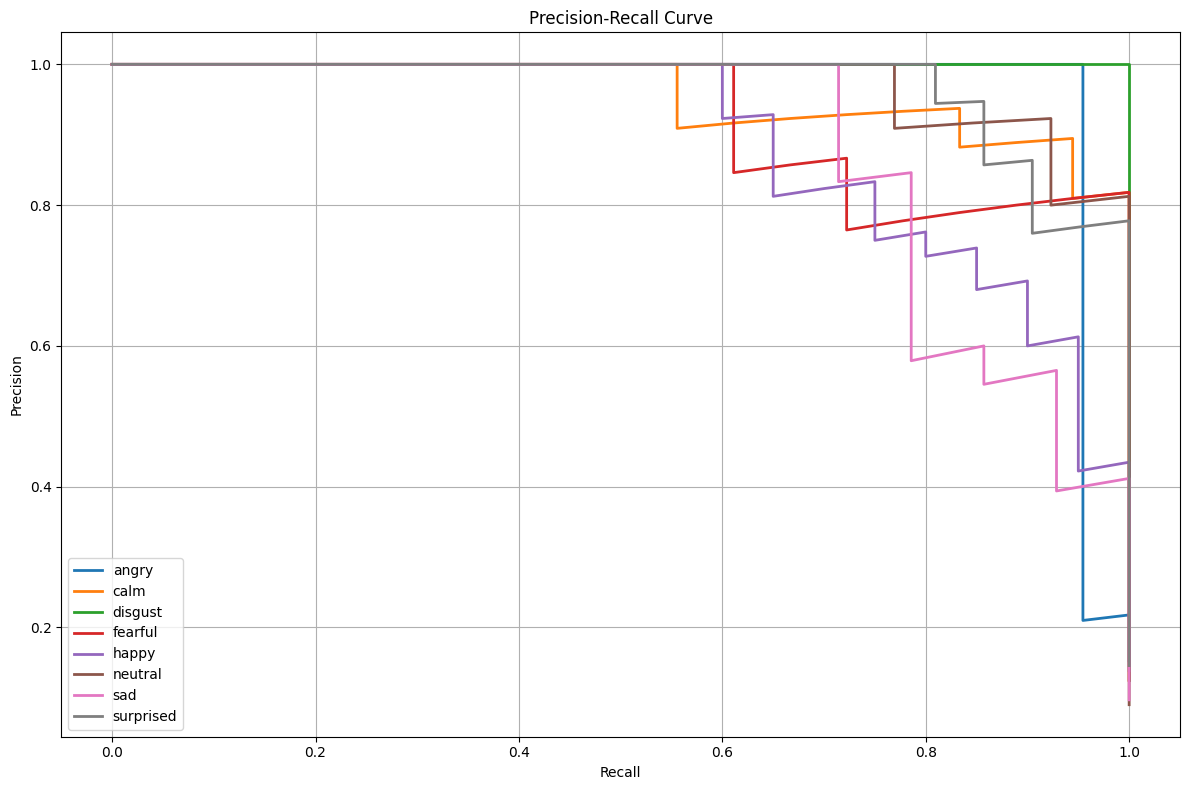


Top 10 Most Confident Misclassifications:
True Label | Predicted Label | Confidence
--------------------------------------------------
happy      | fearful         | 0.8907
sad        | calm            | 0.8871
angry      | fearful         | 0.8835
happy      | surprised       | 0.7764
angry      | happy           | 0.7568
calm       | neutral         | 0.7559
fearful    | sad             | 0.7383
neutral    | sad             | 0.7216
sad        | calm            | 0.7104
angry      | fearful         | 0.7092


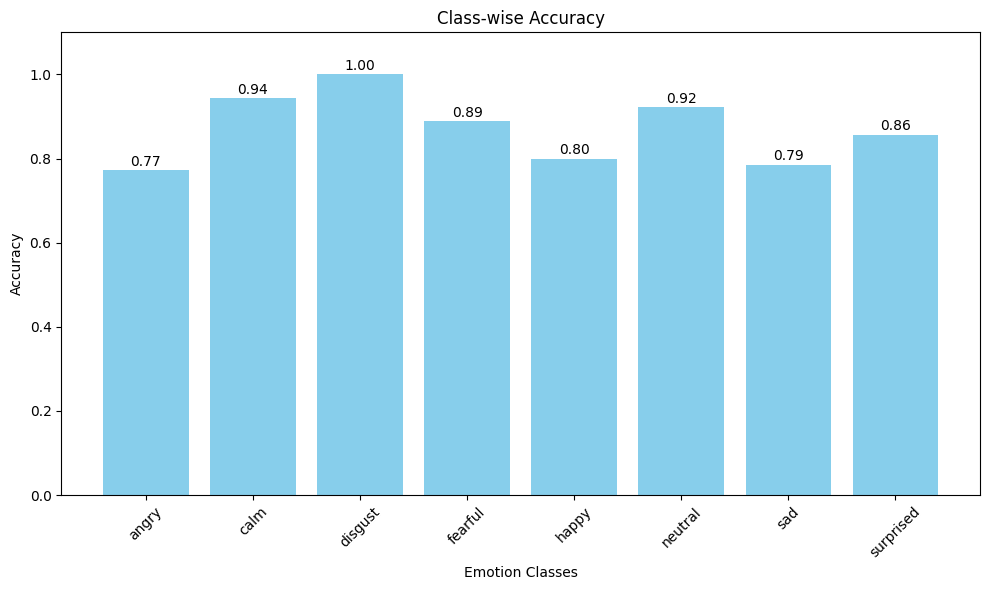

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve

model.load_state_dict(torch.load("best_wav2_model.pt"))
model.to(device)
model.eval()

all_probs = []
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)

        probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        preds = torch.argmax(outputs, dim=1)   # Get predicted class

        all_probs.append(probs.cpu().numpy())
        all_preds.append(preds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

        del inputs, labels, outputs, probs, preds
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)
all_probs = np.concatenate(all_probs)

# Accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# ====================== Confusion Matrix ======================
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=model_labels, yticklabels=model_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# ====================== Classification Report ======================
print("Classification Report:")
report = classification_report(all_labels, all_preds, target_names=model_labels)
print(report)

# ====================== ROC-AUC Curve ======================
plt.figure(figsize=(12, 8))

try:
    if len(model_labels) > 2:  # Multi-class case
        auc_score = roc_auc_score(all_labels, all_probs, multi_class="ovr")
        print(f"AUC-ROC Score (Multi-class): {auc_score:.4f}")

        for i in range(len(model_labels)):
            fpr, tpr, _ = roc_curve(all_labels == i, all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{model_labels[i]} (AUC = {roc_auc:.4f})")

    else:  # Binary classification case
        fpr, tpr, _ = roc_curve(all_labels, all_probs[:, 1])
        auc_score = auc(fpr, tpr)
        print(f"AUC-ROC Score (Binary): {auc_score:.4f}")
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
except Exception as e:
    print(f"Couldn't compute ROC-AUC: {e}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_auc_curve.png')
plt.show()

# ====================== Precision-Recall Curve ======================
plt.figure(figsize=(12, 8))

try:
    if len(model_labels) > 2:  # Multi-class case
        for i in range(len(model_labels)):
            precision, recall, _ = precision_recall_curve(all_labels == i, all_probs[:, i])
            plt.plot(recall, precision, lw=2, label=f"{model_labels[i]}")

    else:  # Binary classification case
        precision, recall, _ = precision_recall_curve(all_labels, all_probs[:, 1])
        plt.plot(recall, precision, lw=2, label="Precision-Recall Curve")
except Exception as e:
    print(f"Couldn't compute Precision-Recall curve: {e}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig('precision_recall_curve.png')
plt.show()

# ====================== Top Misclassifications Analysis ======================
# indices of misclassified examples
misclassified_indices = np.where(all_preds != all_labels)[0]

if len(misclassified_indices) > 0:
    # Get confidence scores for misclassifications
    misclassification_confidences = np.max(all_probs[misclassified_indices], axis=1)

    # Sort misclassifications by confidence (most confident errors first)
    sorted_indices = np.argsort(-misclassification_confidences)

    # Display top confident misclassifications
    print("\nTop 10 Most Confident Misclassifications:")
    print("True Label | Predicted Label | Confidence")
    print("-" * 50)

    for idx in sorted_indices[:10]:  # Show top 10
        true_label = model_labels[all_labels[misclassified_indices[idx]]]
        pred_label = model_labels[all_preds[misclassified_indices[idx]]]
        confidence = misclassification_confidences[idx]
        print(f"{true_label:10} | {pred_label:15} | {confidence:.4f}")

# ====================== Class-wise Accuracy ======================
plt.figure(figsize=(10, 6))
class_accuracy = []

for i in range(len(model_labels)):
    # Get indices where true label is class i
    class_indices = np.where(all_labels == i)[0]
    if len(class_indices) > 0:
        # Calculate accuracy for this class
        class_acc = np.mean(all_preds[class_indices] == i)
        class_accuracy.append(class_acc)
    else:
        class_accuracy.append(0)
## CLASS WISE ACCURACY
plt.bar(model_labels, class_accuracy, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_accuracy.png')
plt.show()